In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd


# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for easy visualization
y = iris.target

# For simplicity, consider only the first two classes
X = X[y != 2]
y = y[y != 2]

# Convert labels to {-1, 1}
y = np.where(y == 0, -1, 1)

df = pd.DataFrame(X, columns=iris.feature_names[:2])
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
95,5.7,3.0
96,5.7,2.9
97,6.2,2.9
98,5.1,2.5


W: [ 0.79  -1.007]
b: -1.2400000000000009


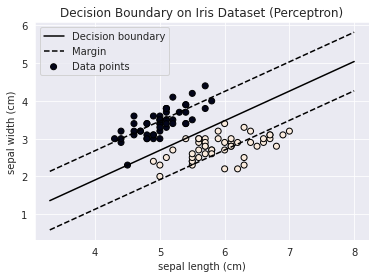

In [2]:

# Perceptron algorithm to find W and b
def perceptron(X, y, learning_rate=0.01, n_iter=1000):
    W = np.zeros(X.shape[1])
    b = 0

    for _ in range(n_iter):
        for xi, yi in zip(X, y):
            if yi * (np.dot(xi, W) + b) <= 0:
                W += learning_rate * yi * xi
                b += learning_rate * yi
    return W, b

# Train the Perceptron
W, b = perceptron(X, y)
print('W:', W)
print('b:', b)  

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', label='Data points')
x0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x1 = -(W[0] * x0 + b) / W[1]
plt.plot(x0, x1, 'k-', label='Decision boundary')

# Plot the margin lines (optional, depending on the context)
margin = 1 / np.sqrt(np.sum(W**2))
x1_margin1 = x1 + margin / np.abs(W[1])
x1_margin2 = x1 - margin / np.abs(W[1])
plt.plot(x0, x1_margin1, 'k--', label='Margin')
plt.plot(x0, x1_margin2, 'k--')

# Labels and title
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Decision Boundary on Iris Dataset (Perceptron)')
plt.legend()
plt.show()


In [3]:
def wb2mq(w, b):
    assert len(w) == 2 # 2D data
    assert np.all(w != 0) and b != 0 # Non-zero values
    m = -w[0] / w[1]
    q = -b / w[1]
    return [m, q] # m and q

def params2boundary(w, b):
    m, q = wb2mq(w, b)
    print("m, q", m, q)
    print(f"Boudary line: y = {m: .2f}x + {q: .2f}")
    return lambda x: m*x + q

def plot_data(data,x,y,hues,**kwargs):
    sns.scatterplot(data=data, x=x, y=y, hue=hues, **kwargs)

def plot_model(model):
    x_spaces = np.linspace(1,5)
    sns.lineplot(x=x_spaces, y=model(x_spaces), color='black')

W: [ 0.79  -1.007]
b: -1.2400000000000009
Boundary line: y = 0.78x + -1.23


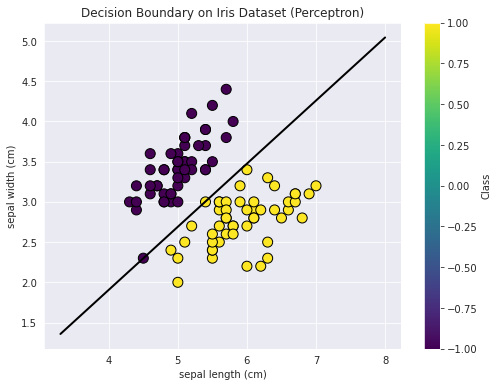

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For data visualization, if needed
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for easy visualization
y = iris.target

# For simplicity, consider only the first two classes
X = X[y != 2]
y = y[y != 2]

# Convert labels to {-1, 1}
y = np.where(y == 0, -1, 1)

# Perceptron algorithm to find W and b
def perceptron(X, y, learning_rate=0.01, n_iter=1000):
    W = np.zeros(X.shape[1])
    b = 0

    for _ in range(n_iter):
        for xi, yi in zip(X, y):
            if yi * (np.dot(xi, W) + b) <= 0:
                W += learning_rate * yi * xi
                b += learning_rate * yi
    return W, b

# Train the Perceptron
W, b = perceptron(X, y)
print('W:', W)
print('b:', b)

# Function to convert W and b to slope and intercept of the boundary line
def params2boundary(w, b):
    assert len(w) == 2  # 2D data
    assert np.all(w != 0) and b != 0  # Non-zero values
    m = -w[0] / w[1]
    q = -b / w[1]
    print(f"Boundary line: y = {m:.2f}x + {q:.2f}")
    return m, q

# Get slope and intercept of the boundary line
m, q = params2boundary(W, b)

# Plotting the data points and the decision boundary
def plot_data(X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title('Decision Boundary on Iris Dataset (Perceptron)')
    plt.colorbar(label='Class')
    plt.grid(True)

def plot_model(m, q):
    x_line = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    y_line = m * x_line + q
    plt.plot(x_line, y_line, 'k-', linewidth=2)

plot_data(X, y)
plot_model(m, q)

plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For data visualization, if needed
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
# Use only the last two features for easy visualization 
X = iris.data[:, 2:]
y = iris.target

# For simplicity, consider only the first two classes
X = X[y != 2]
y = y[y != 2]

# Convert labels to {-1, 1}
y = np.where(y == 0, -1, 1)
df = pd.DataFrame(X, columns=iris.feature_names[2:])
df['target'] = y
df


,petal length (cm),petal width (cm),target
0,1.4,0.2,-1
1,1.4,0.2,-1
2,1.3,0.2,-1
3,1.5,0.2,-1
4,1.4,0.2,-1
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


W: [0.005 0.008]
b: -0.02
Boundary line: y = -0.63x + 2.50


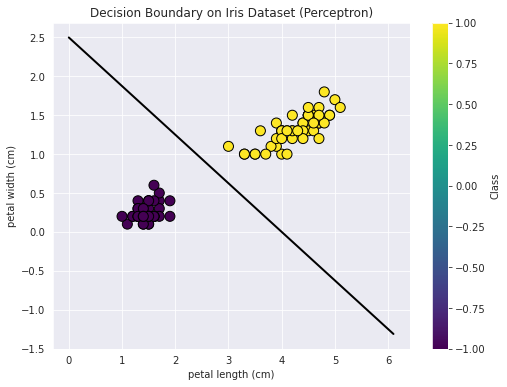

In [13]:
# Perceptron algorithm to find W and b
def perceptron(X, y, learning_rate=0.01, n_iter=1000):
    W = np.zeros(X.shape[1])
    b = 0

    for _ in range(n_iter):
        for xi, yi in zip(X, y):
            if yi * (np.dot(xi, W) + b) <= 0:
                W += learning_rate * yi * xi
                b += learning_rate * yi
    return W, b

# Train the Perceptron
W, b = perceptron(X, y)
print('W:', W)
print('b:', b)

# Function to convert W and b to slope and intercept of the boundary line
def params2boundary(w, b):
    assert len(w) == 2  # 2D data
    assert np.all(w != 0) and b != 0  # Non-zero values
    m = -w[0] / w[1]
    q = -b / w[1]
    print(f"Boundary line: y = {m:.2f}x + {q:.2f}")
    return m, q

# Get slope and intercept of the boundary line
m, q = params2boundary(W, b)

# Plotting the data points and the decision boundary
def plot_data(X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.title('Decision Boundary on Iris Dataset (Perceptron)')
    plt.colorbar(label='Class')
    plt.grid(True)

def plot_model(m, q):
    x_line = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    y_line = m * x_line + q
    plt.plot(x_line, y_line, 'k-', linewidth=2)

plot_data(X, y)
plot_model(m, q)

plt.show()


## One vs All

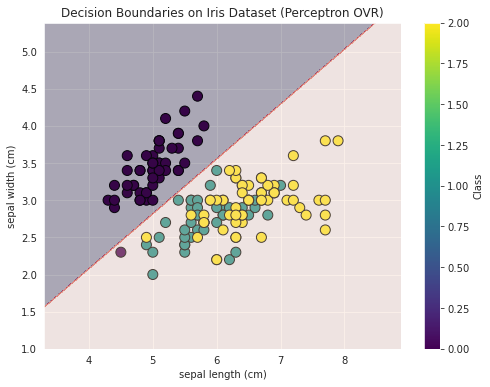

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for easy visualization
y = iris.target

# Perceptron algorithm to find W and b
def perceptron(X, y, learning_rate=0.01, n_iter=1000):
    W = np.zeros(X.shape[1])
    b = 0

    for _ in range(n_iter):
        for xi, yi in zip(X, y):
            if yi * (np.dot(xi, W) + b) <= 0:
                W += learning_rate * yi * xi
                b += learning_rate * yi
    return W, b

# One-vs-Rest classification
class PerceptronOVR:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.models = []

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for cls in self.classes_:
            y_binary = np.where(y == cls, 1, -1)
            W, b = perceptron(X, y_binary, self.learning_rate, self.n_iter)
            self.models.append((W, b))

    def predict(self, X):
        scores = [np.dot(X, W) + b for W, b in self.models]
        return self.classes_[np.argmax(scores, axis=0)]

# Train the Perceptron OVR
clf = PerceptronOVR()
clf.fit(X, y)

# Plot the decision boundary
def plot_decision_boundaries(X, y, clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)

def plot_data(X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title('Decision Boundaries on Iris Dataset (Perceptron OVR)')
    plt.colorbar(label='Class')
    plt.grid(True)

plot_data(X, y)
plot_decision_boundaries(X, y, clf)

plt.show()


## Imagine with have m=3 and q = 2, How to plot this linear equation ?

<AxesSubplot:>

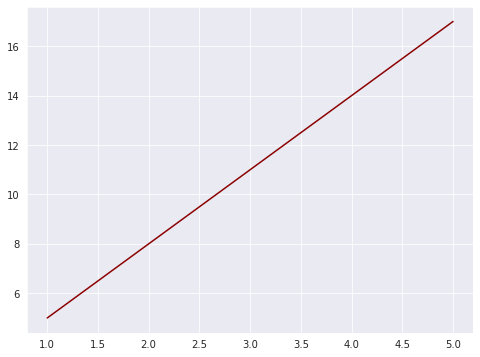

In [22]:
## Imagine with have m=3 and q = 2, How to plot this linear equation ?
linear_model = lambda m,q: lambda x : m*x+q
m = 3
q = 2
plt.figure(figsize=(8, 6))
x_vals = np.linspace(1, 5, 100)
y_vals = [linear_model(m, q)(x) for x in x_vals]
sns.lineplot(x=x_vals, y=y_vals,  color='darkred')

## Cancer breast dataset analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 6]  # Width, Height in inches
sns.set_context("notebook", rc={"figure.figsize": (10, 6)})

# Load the Breast Cancer dataset
cancer = load_breast_cancer() 

In [9]:
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target

In [10]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [12]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [14]:
df_cancer.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [38]:
def plot_scatter(data,x,y,text, **kwargs):
    sns.scatterplot(data=data, x=x, y=y, cmap='viridis', edgecolor='k', s=100, hue="target")
    if text is not None:
        plt.title(text)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()


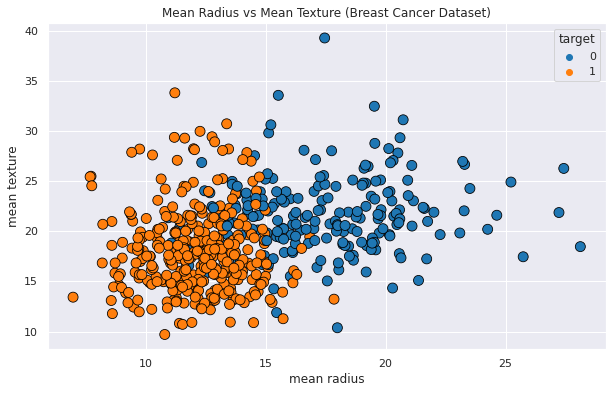

In [39]:
plot_scatter(df_cancer,"mean radius","mean texture", "Mean Radius vs Mean Texture (Breast Cancer Dataset)")

In [40]:
 
for feature in df_cancer.columns:
    if feature != 'mean radius':
        plot_scatter(df_cancer, "mean radius", feature, f"Mean Radius vs {feature} (Breast Cancer Dataset)")